## 1. Loading the dataset

In [56]:
import numpy as np
from tensorflow.keras.datasets import mnist

# load dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()


In [57]:
print(X_train.shape)
print(X_test.shape)


(60000, 28, 28)
(10000, 28, 28)


In [58]:
# convert from integers to floats
X_train = X_train.astype("float32")
X_test = X_test.astype("float32")
# normalize to range 0-1
X_train = X_train / 255.0
X_test = X_test / 255.0


In [59]:
print(X_train.shape)
print(X_test.shape)


(60000, 28, 28)
(10000, 28, 28)


In [60]:
from keras.utils.np_utils import to_categorical

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)


# 2. Creating the Model

In [61]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D  # convolution layers
from keras.layers import Dense, Flatten  # core layers

model = Sequential()
model.add(
    Conv2D(
        32,
        (3, 3),
        activation="relu",
        kernel_initializer="he_uniform",
        input_shape=(28, 28, 1),
    )
)
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(100, activation="relu", kernel_initializer="he_uniform"))
model.add(Dense(10, activation="softmax"))
# compile model
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])


In [62]:
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 5408)              0         
                                                                 
 dense_2 (Dense)             (None, 100)               540900    
                                                                 
 dense_3 (Dense)             (None, 10)                1010      
                                                                 
Total params: 542,230
Trainable params: 542,230
Non-trainable params: 0
________________________________________________

In [63]:
model.fit(X_train, y_train, batch_size=128, validation_split=0.2, epochs=10)


Epoch 1/10
375/375 [==============================] - 19s 50ms/step - loss: 0.2092 - accuracy: 0.9372 - val_loss: 0.0861 - val_accuracy: 0.9748
Epoch 2/10
375/375 [==============================] - 18s 47ms/step - loss: 0.0638 - accuracy: 0.9805 - val_loss: 0.0600 - val_accuracy: 0.9819
Epoch 3/10
375/375 [==============================] - 18s 48ms/step - loss: 0.0385 - accuracy: 0.9883 - val_loss: 0.0605 - val_accuracy: 0.9823
Epoch 4/10
375/375 [==============================] - 19s 50ms/step - loss: 0.0270 - accuracy: 0.9917 - val_loss: 0.0531 - val_accuracy: 0.9844
Epoch 5/10
375/375 [==============================] - 19s 50ms/step - loss: 0.0183 - accuracy: 0.9945 - val_loss: 0.0568 - val_accuracy: 0.9845
Epoch 6/10
375/375 [==============================] - 19s 50ms/step - loss: 0.0121 - accuracy: 0.9967 - val_loss: 0.0583 - val_accuracy: 0.9834
Epoch 7/10
375/375 [==============================] - 18s 47ms/step - loss: 0.0078 - accuracy: 0.9978 - val_loss: 0.0536 - val_accuracy:

In [64]:
model.save("MNIST.h5")


In [65]:
y_pred = model.predict(
    X_test
)  # Predict class probabilities as 2 => [0.1, 0, 0.9, 0, 0, 0, 0, 0, 0, 0]

Y_pred = np.argmax(y_pred, 1)  # Decode Predicted labels
Y_test = np.argmax(y_test, 1)  # Decode labels


# 3. Building the Confusion Matrix 

In [66]:
import numpy as np


def comp_confmat(actual, predicted):

    classes = np.unique(actual)  # extract the different classes
    matrix = np.zeros(
        (len(classes), len(classes))
    )  # initialize the confusion matrix with zeros

    for i in range(len(classes)):
        for j in range(len(classes)):
            matrix[i, j] = np.sum((actual == classes[i]) & (predicted == classes[j]))

    return matrix


mat = comp_confmat(Y_test, Y_pred)
print("Confusion Matrix:")
print(" ", end=" ")
[print(i, end="\t") for i in range(len(mat.transpose()))]
print()
for i, index in zip(mat.transpose(), range(len(mat.transpose()))):
    print(index, end=" ")
    for j in i:
        print("{:.0f}".format(j), end="\t")
    print()


Confusion Matrix:
  0	1	2	3	4	5	6	7	8	9	
0 975	0	3	0	0	1	4	1	4	0	
1 0	1126	3	0	1	0	1	1	0	3	
2 0	2	1006	1	0	1	0	6	1	0	
3 0	0	3	998	0	5	1	1	3	1	
4 0	0	0	0	976	0	1	0	2	8	
5 1	2	0	3	0	878	2	0	0	4	
6 3	4	2	0	1	6	949	0	3	0	
7 1	0	9	4	0	0	0	1016	7	9	
8 0	1	5	2	0	1	0	2	951	4	
9 0	0	1	2	4	0	0	1	3	980	


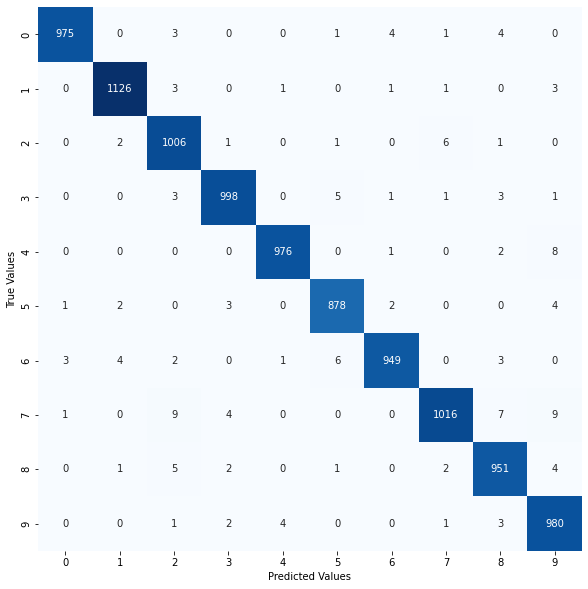

In [67]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

fig = plt.figure(figsize=(10, 10))  # Set Figure
# Plot Confusion matrix
sns.heatmap(
    mat.transpose(), square=True, annot=True, cbar=False, cmap=plt.cm.Blues, fmt=".0f"
)
plt.xlabel("Predicted Values")
plt.ylabel("True Values")
plt.show()


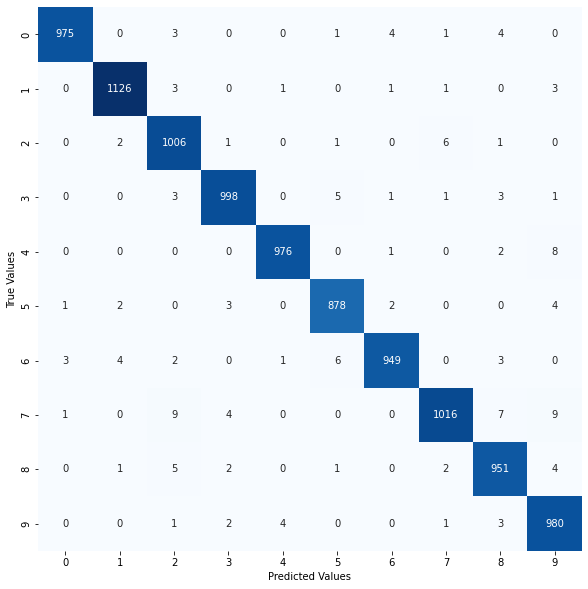

In [68]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

fig = plt.figure(figsize=(10, 10))  # Set Figure

# mat = confusion_matrix(Y_test, Y_pred) # Confusion matrix
mat_sklearn = confusion_matrix(Y_test, Y_pred)

# Plot Confusion matrix
sns.heatmap(
    mat_sklearn.T, square=True, annot=True, cbar=False, cmap=plt.cm.Blues, fmt=".0f"
)
plt.xlabel("Predicted Values")
plt.ylabel("True Values")
plt.show()


# 4. Calculating the Precision,Recall and F1 score.

In [69]:
true_pos = np.diag(mat)
false_pos = np.sum(mat, axis=0) - true_pos
false_neg = np.sum(mat, axis=1) - true_pos

precision = true_pos / (true_pos + false_pos)
recall = true_pos / (true_pos + false_neg)
f1_score = (2 * (precision * recall)) / (precision + recall)


In [70]:
target_names = ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"]
rows = list(zip(target_names, precision, recall, f1_score))
print("Label\t\tprecision\trecall\t\tf1-score")
# for i in range(len(rows)):
#     print(rows[i],"\n")
for i in rows:
    print("  {:<8}\t{:.4f}\t\t{:.4f}\t\t{:.4f}".format(i[0], i[1], i[2], i[3]))


Label		precision	recall		f1-score
  0       	0.9868		0.9949		0.9909
  1       	0.9921		0.9921		0.9921
  2       	0.9892		0.9748		0.9819
  3       	0.9862		0.9881		0.9871
  4       	0.9889		0.9939		0.9914
  5       	0.9865		0.9843		0.9854
  6       	0.9804		0.9906		0.9855
  7       	0.9713		0.9883		0.9797
  8       	0.9845		0.9764		0.9804
  9       	0.9889		0.9713		0.9800


In [71]:
from sklearn.metrics import classification_report

print(classification_report(Y_test, Y_pred))


              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.99      0.97      0.98      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.98      0.99       892
           6       0.98      0.99      0.99       958
           7       0.97      0.99      0.98      1028
           8       0.98      0.98      0.98       974
           9       0.99      0.97      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000

